In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
path = r"C:\Users\Domovoy\Downloads\sms-spam-corpus.csv"
df = pd.read_csv(path, encoding='latin1')
df.head()['v2']
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [27]:
import re
df['v2'].replace(regex=True, inplace=True, to_replace=r'[^a-zA-Z^ \t\n\r]', value=r'')
df['v2'] = df['v2'].astype(str).map(lambda x: x.lower())

df.head()['v2']

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in  a wkly comp to win fa cup final...
3          u dun say so early hor u c already then say
4    nah i dont think he goes to usf he lives aroun...
Name: v2, dtype: object

In [28]:
stop = "''/am/is/are/be/being/been/have/has/having/had//do/does/doing/did/a/to/the/in/"
stop_words = stop.split('/')

df['v2'] = df['v2'].apply(lambda x:' '.join([word for word in x.split(' ') if word not in stop_words]))

df.head()['v2']

0    go until jurong point crazy available only bug...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3          u dun say so early hor u c already then say
4    nah i dont think he goes usf he lives around h...
Name: v2, dtype: object

In [29]:
import nltk
# ps = nltk.stem.PorterStemmer()
ps = nltk.stem.SnowballStemmer('english')
df['v2'] = df['v2'].apply(lambda x:' '.join([ps.stem(word) for word in x.split(' ')]))

df.head()['v2']

0    go until jurong point crazi avail onli bugi n ...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkts st ...
3          u dun say so earli hor u c alreadi then say
4    nah i dont think he goe usf he live around her...
Name: v2, dtype: object

In [30]:
from collections import defaultdict

f_ham = open('ham.txt', 'w')
f_spam = open('spam.txt', 'w')

ham = df[df['v1'] == 'ham']['v2']
spam = df[df['v1'] == 'spam']['v2']

ham_count_dict = defaultdict(int)
spam_count_dict = defaultdict(int)

for sentence in ham:
  for word in sentence.split():
    ham_count_dict[word] += 1

for key, item in ham_count_dict.items():
    f_ham.write('{} : {}'.format(key, item) + '\n')
    
for sentence in spam:
  for word in sentence.split():
    spam_count_dict[word] += 1

for key, item in spam_count_dict.items():
    f_spam.write('{} : {}'.format(key, item) + '\n')

    
ham_len = ham_count_dict.keys()
spam_len = spam_count_dict.keys()

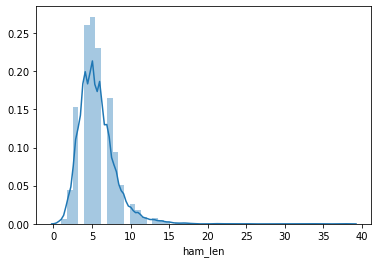

In [31]:
import seaborn as sns
fig, ax = plt.subplots()

ham_data = [len(x) for x in ham_len]
df_ham = pd.DataFrame({'ham_len' : ham_data})
fig = sns.distplot(df_ham['ham_len']);
fig.figure.savefig('fig_1.png')

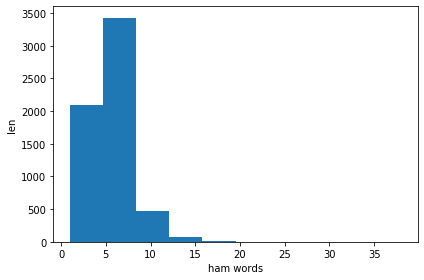

In [32]:
plt.hist(df_ham['ham_len'])
plt.xlabel('ham words')
plt.ylabel('len')
plt.tight_layout()
plt.savefig('fig_2.png')

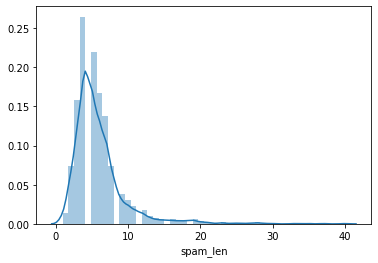

In [33]:
spam_data = [len(x) for x in spam_len]
df_spam = pd.DataFrame({'spam_len' : spam_data})

fig = sns.distplot(df_spam['spam_len']);
fig.figure.savefig('fig_3.png')

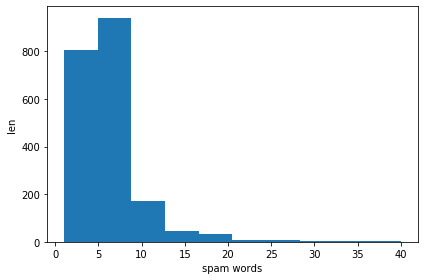

In [34]:
plt.hist(df_spam['spam_len'])
plt.xlabel('spam words')
plt.ylabel('len')
plt.tight_layout()
plt.savefig('fig_4.png')

In [35]:
import numpy as np
print('Ham mean: {} | Spam mean: {}'.format(np.mean(ham_data), np.mean(spam_data)))

Ham mean: 5.634574380843038 | Spam mean: 5.954861111111111


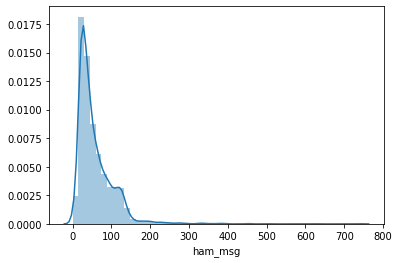

In [36]:
ham_msg = [len(x) for x in ham]
df_ham = pd.DataFrame({'ham_msg' : ham_msg})
fig = sns.distplot(df_ham['ham_msg']);
fig.figure.savefig('fig_5.png')

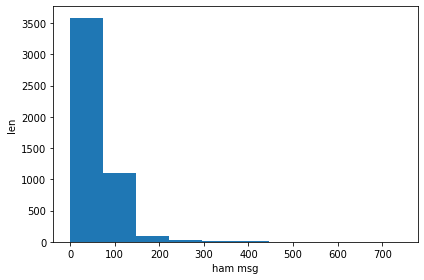

In [37]:
plt.hist(df_ham['ham_msg'])
plt.xlabel('ham msg')
plt.ylabel('len')
plt.tight_layout()
plt.savefig('fig_6.png')

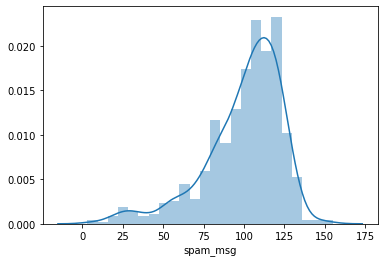

In [38]:
spam_msg = [len(x) for x in spam]
df_spam = pd.DataFrame({'spam_msg' : spam_msg})
fig = sns.distplot(df_spam['spam_msg']);
fig.figure.savefig('fig_7.png')

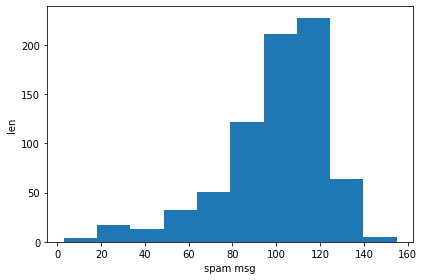

In [39]:
plt.hist(df_spam['spam_msg'])
plt.xlabel('spam msg')
plt.ylabel('len')
plt.tight_layout()
plt.savefig('fig_8.png')

In [40]:
print('Ham msg mean: {} | Spam msg mean: {}'.format(np.mean(ham_msg), np.mean(spam_msg)))

Ham msg mean: 57.50341968911917 | Spam msg mean: 99.59571619812584


In [41]:
list_ham = list(ham_count_dict.items())
list_ham.sort(key=lambda i: i[1])
list_ham = list_ham[-20:]
list_ham = dict(list_ham)

list_spam = list(spam_count_dict.items())
list_spam.sort(key=lambda i: i[1])
list_spam = list_spam[-20:]
list_spam = dict(list_spam)

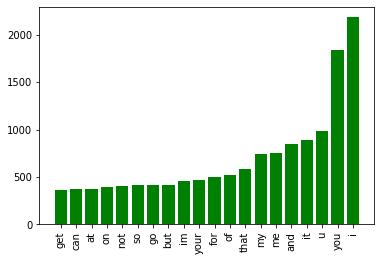

In [42]:
plt.bar(list_ham.keys(), list_ham.values(), color='g')
plt.xticks(rotation=90);
plt.savefig('fig_9.png')

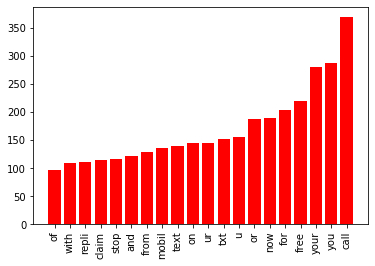

In [43]:
plt.bar(list_spam.keys(), list_spam.values(), color='r')
plt.xticks(rotation=90);
plt.savefig('fig_10.png')